The comments have been mentioned in the code itself. Other explanations are provided below:

Lambda= 4.8 has the best performance on the dataset with 0.6 as partition fraction. Weights of the ridge regression model have been examined and 'whole weight' and 'shell weight' are the most significant attributes. 

While 'shucked weight' and 'viscera weight' are the least significant attributes. Removal of these attributes from the training model improves the mean squared error value marginally (in fractions).

Effect of λ on error changes for different partitions of the data into training and test sets. Lambda is small when partition fraction is too low, and it increases with increase in partitition fraction and becomes constant with further increase in lambda.

Minimum training and test error decrease drastically with increase in lambda and then fluctuate marginally with further increase in lambda, till the ideal lambda value is reached. Further increase in lambda may increase the error.

Actual and predicted values graph has been plotted. The model appears to be good as all the points are close to the 45-degree line through the plot.

Other observations and comments are mentioned in the code comments itself.

In [12]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as numpy
from sklearn import preprocessing
from sklearn.linear_model import Ridge
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import time
import random

In [13]:
#Function returning identity matrix of order n
def identity_matrix(n):
    T = np.full((n,n),0)
    for i in range(n):
        T[i][i] = 1
    return np.mat(T)

In [14]:
#calculates the linear least squares solution with the ridge regression penalty parameter (λ) and returns the regression weights
def mylinridgereg(X,Y,Lambda):
    W = np.mat( np.linalg.inv(np.mat(X.T) * np.mat(X) + Lambda*identity_matrix(X.T.shape[0]) ) )* np.mat(X.T) * np.mat(Y) 
    return W

In [15]:
#returns a prediction of the target variable given the input variables and regression weights
def mylinridgeregeval(X,W):
    return np.mat(X) * np.mat(W)

In [16]:
total_rows = 4177
total_columns = 11

#initializing array variables with zeros
input_vars = np.zeros((total_rows,total_columns), dtype=np.float)
y_var = np.zeros((total_rows,1), dtype=np.float)


In [17]:
#transform the attributes to possess zero mean and unit standard deviation.
def standardize_data(X,fraction):
    n = total_columns
    C = [0]*n
    S = [0]*n

    m = int(total_rows*fraction)
    for itr in range(m): 
        for i in range(1,n):
            C[i] += X[itr][i]
            S[i] += X[itr][i]*X[itr][i]
    for i in range(len(C)):
        C[i] /= m
        S[i] /= m
    for itr in range(total_rows):
        for i in range(1,n):
            X[itr][i] -= C[i]
            X[itr][i] /= pow(S[i]-C[i]*C[i],0.5)


In [18]:
#Open text file and Transform gender attribute into a three column binary representation.
with open("abalone.data.txt") as f:
        num = 0
        for data in f:
            T = data[:-1].split(",")
            n = len(T)
            input_vars[num][0] = 1
            if T[0]=='F':
                input_vars[num][1] = 1
            elif T[0]=='I':
                input_vars[num][2] = 1
            else:
                input_vars[num][3] = 1
            for i in range(1,n-1):
                f = float(T[i])
                input_vars[num][i+3] = f
            y_var[num] = float(T[-1])
            num += 1

In [19]:
lambda_range = np.arange(0.0, 5.0, 0.2).tolist() # Lambda list from 0.0 to 5.0 with increment of 0.2
fraction_range = np.arange(0.1, 1.0, 0.1).tolist()  #Train test fraction from 0.0 to 1.0
error_range = []
iterations = 10 #10 iterations for each fraction.
min_test_error=10.0
min_test_errors=[]
lambda_list_min_errors=[]


Partition fraction: 0.1


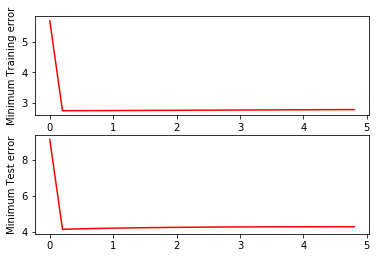

Partition fraction: 0.2


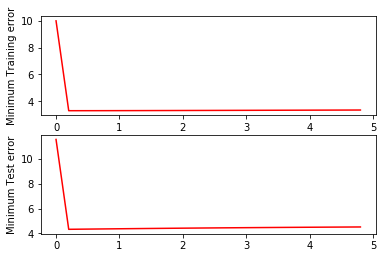

Partition fraction: 0.3


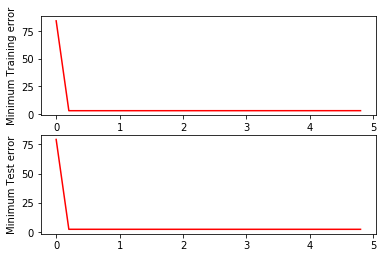

Partition fraction: 0.4


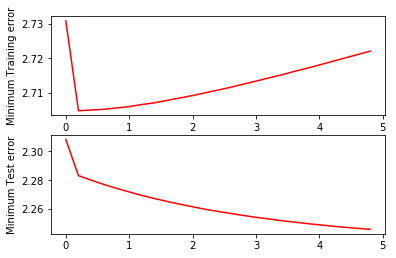

Partition fraction: 0.5


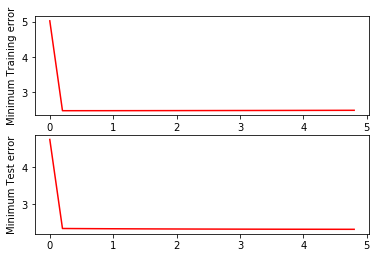

Partition fraction: 0.6


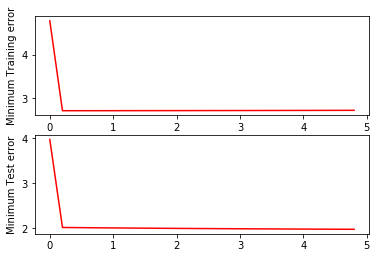

Partition fraction: 0.7


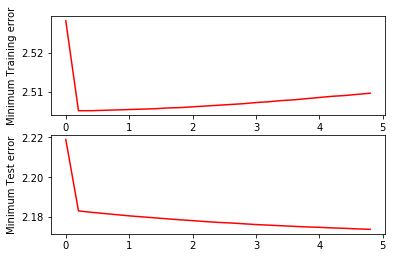

Partition fraction: 0.8


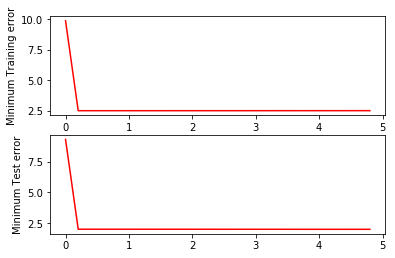

Partition fraction: 0.9


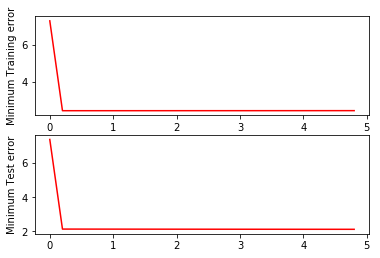

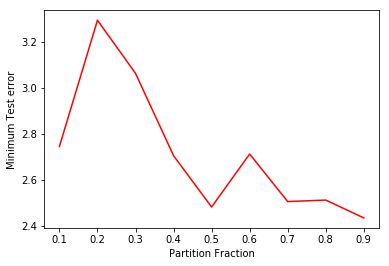

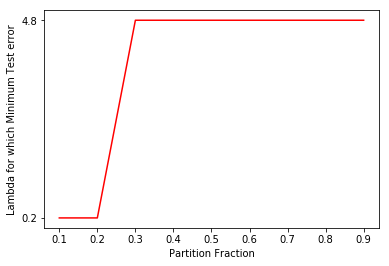

In [9]:
#Start iterating for each train-test fraction
for frac in fraction_range:
        print "Partition fraction: " + str(frac)
        err_train = [0]*len(lambda_range)
        err_test = [0]*len(lambda_range)
        for num in range(iterations):
            X = copy.deepcopy(input_vars)
            Y = copy.deepcopy(y_var)
            
            standardize_data(X,frac) #Standardize the input data.

            total_rows_IN_TRAINING = int(total_rows*frac)
            total_rows_IN_TEST = total_rows - total_rows_IN_TRAINING
            for l in range(len(lambda_range)):
                Lambda = lambda_range[l]
                W = mylinridgereg(X[:total_rows_IN_TRAINING],Y[:total_rows_IN_TRAINING],Lambda) #Get regression weights for X,Y and lambda
                
                #Create train_Y and test_Y
                Train_Y = mylinridgeregeval(X[:total_rows_IN_TRAINING],W)
                Test_Y = mylinridgeregeval(X[total_rows_IN_TRAINING:],W)

                train_error = 0
                
                #Calculate mean square error
                for i in range(len(Train_Y)):
                    train_error += ((Train_Y[i]-Y[i])**2)

                test_error = 0
                for i in range(total_rows_IN_TEST):
                    test_error += ((Test_Y[i]-Y[i+total_rows_IN_TRAINING])**2)
                
                train_error /= (2*len(Train_Y))
                test_error /= (2*len(Test_Y))

                err_train[l] += train_error
                err_test[l] += test_error
        
        train_errors_list=[]
        test_errors_list=[]
        lambda_list=[]

        for l in range(len(lambda_range)):
#             print("Lambda: "+str(lambda_range[l]))
#             print("Fraction: "+str(frac))
#             print("Training Error: "+   str(float(err_train[l]/iterations)))
#             print("Testing Error: " + str(float(err_test[l]/iterations)))

            test_error = float(err_test[l]/iterations)
            

            train_errors_list.append(round(float(err_train[l]/iterations),4))
            test_errors_list.append(round(float(err_test[l]/iterations),4))
            lambda_list.append(lambda_range[l])

            #calculate best lambda, best partition fraction and optimum regression weights.
            if min_test_error>test_error:
                min_test_error=test_error
                best_lambda = str(lambda_range[l])
                best_partition = frac
                best_weights=W
        
        #Plot lambda list v/s train errors list and test errors list
        plt.subplot(211)
        plt.xlabel("Lambda")
        plt.ylabel("Minimum Training error")
        plt.plot(lambda_list,train_errors_list,'r-')
        plt.subplot(212)
        plt.ylabel("Minimum Test error")
        plt.plot(lambda_list,test_errors_list,'r-')

        plt.savefig("graph_lambda_"+str(frac)+".png")
        plt.show()
        plt.close()

        min_test_errors.append(min(train_errors_list))
        lambda_list_min_errors.append(best_lambda)
        

#Plot Fractions list v/s minimum test errors list
plt.xlabel("Partition Fraction")
plt.ylabel("Minimum Test error")
plt.plot(fraction_range,min_test_errors,'r-')
plt.savefig("graph_frac_test.png")
plt.show()
plt.close()

#Plot Fractions list v/s lambda list for which minimum error is seen.
plt.xlabel("Partition Fraction")
plt.ylabel("Lambda for which Minimum Test error")
plt.plot(fraction_range,lambda_list_min_errors,'r-')
plt.savefig("graph_frac_lambda_errors.png")    
plt.show()
plt.close()

1.97453895895
4.8
0.6
[[ 10.1433806 ]
 [  0.13167064]
 [ -0.27150974]
 [  0.13270803]
 [ -0.04853224]
 [  1.30596379]
 [  0.35172157]
 [  4.2579127 ]
 [ -4.49598459]
 [ -1.04421612]
 [  1.43326398]]


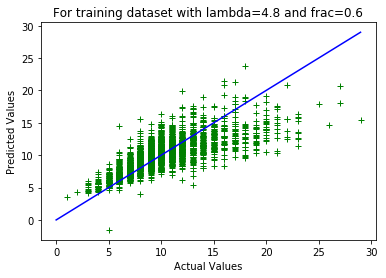

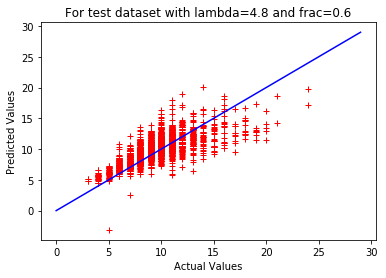

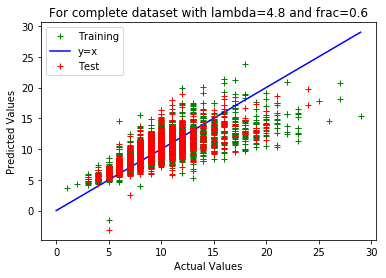

In [10]:
print min_test_error
print best_lambda
print best_partition
print best_weights


#Predict values using ridge regressor and compare them with the actual values and plot the required graphs.
Lamda = best_lambda
frac = best_partition
W_Final = [0]*total_columns
num = 100

for i in range(num):
    X = copy.deepcopy(input_vars)
    Y = copy.deepcopy(y_var)  

    standardize_data(X,frac)

    total_rows_IN_TRAINING = int(total_rows*frac)
    total_rows_IN_TEST = total_rows - total_rows_IN_TRAINING

    W = best_weights
    for j in range(len(W)):
        W_Final[j] += W[j]

for i in range(len(W)):
    W[i] = W_Final[i]/num

Z = mylinridgeregeval(X,W)

A = []
for i in range(30):
    A.append(i)

plt.plot(Y[:total_rows_IN_TRAINING],Z[:total_rows_IN_TRAINING],'g+')
plt.plot(A,A,'b-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("For training dataset with lambda=" + str(Lamda) + " and frac=" + str(frac))
plt.savefig("graphs_lambda_frac_train.png")
plt.show()
plt.close()

plt.plot(Y[total_rows_IN_TRAINING:],Z[total_rows_IN_TRAINING:],'r+')
plt.plot(A,A,'b-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("For test dataset with lambda=" + str(Lamda) + " and frac=" + str(frac))
plt.savefig("graphs_lambda_frac_test.png")
plt.show()
plt.close()


plt.plot(Y[:total_rows_IN_TRAINING],Z[:total_rows_IN_TRAINING],'g+')
plt.plot(A,A,'b-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("For complete dataset with lambda=" + str(Lamda) + " and frac=" + str(frac))
plt.plot(Y[total_rows_IN_TRAINING:],Z[total_rows_IN_TRAINING:],'r+')
plt.legend(['Training', 'y=x', 'Test'], loc='upper left')
plt.savefig("graphs_lambda_frac_train_combined.png")
plt.show()

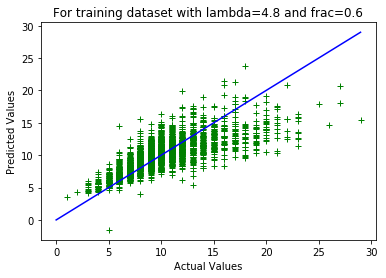

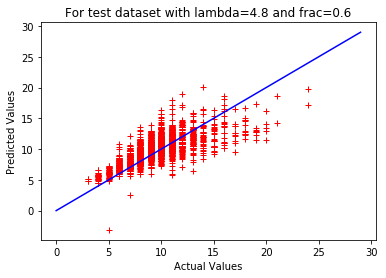

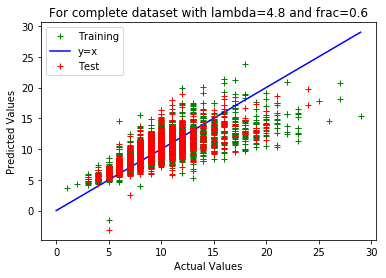

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(Y[:total_rows_IN_TRAINING],Z[:total_rows_IN_TRAINING],'g+')
plt.plot(A,A,'b-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("For training dataset with lambda=" + str(Lamda) + " and frac=" + str(frac))
plt.savefig("graphs_lambda_frac_train.png")
plt.show()
plt.close()

plt.plot(Y[total_rows_IN_TRAINING:],Z[total_rows_IN_TRAINING:],'r+')
plt.plot(A,A,'b-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("For test dataset with lambda=" + str(Lamda) + " and frac=" + str(frac))
plt.savefig("graphs_lambda_frac_test.png")
plt.show()
plt.close()


plt.plot(Y[:total_rows_IN_TRAINING],Z[:total_rows_IN_TRAINING],'g+')
plt.plot(A,A,'b-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("For complete dataset with lambda=" + str(Lamda) + " and frac=" + str(frac))
plt.plot(Y[total_rows_IN_TRAINING:],Z[total_rows_IN_TRAINING:],'r+')
plt.legend(['Training', 'y=x', 'Test'], loc='upper left')
plt.show()
plt.savefig("graphs_lambda_frac_train_combined.png")